# Exercise 1

Fristly, import the necessary libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Load the data
Then load the data from the file `data.csv` into a pandas dataframe:

In [3]:
data = pd.read_csv('data/home_work.csv')
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


split the data into a training and test set before doing any analysis:

In [36]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#### Data exploration
Print some information about the data:

In [19]:
train_data.info()   # we see that there are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 137 to 102
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          126 non-null    object 
 1   Cruise_line        126 non-null    object 
 2   Age                126 non-null    int64  
 3   Tonnage            126 non-null    float64
 4   passengers         126 non-null    float64
 5   length             126 non-null    float64
 6   cabins             126 non-null    float64
 7   passenger_density  126 non-null    float64
 8   crew               126 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 9.8+ KB


plot the data:

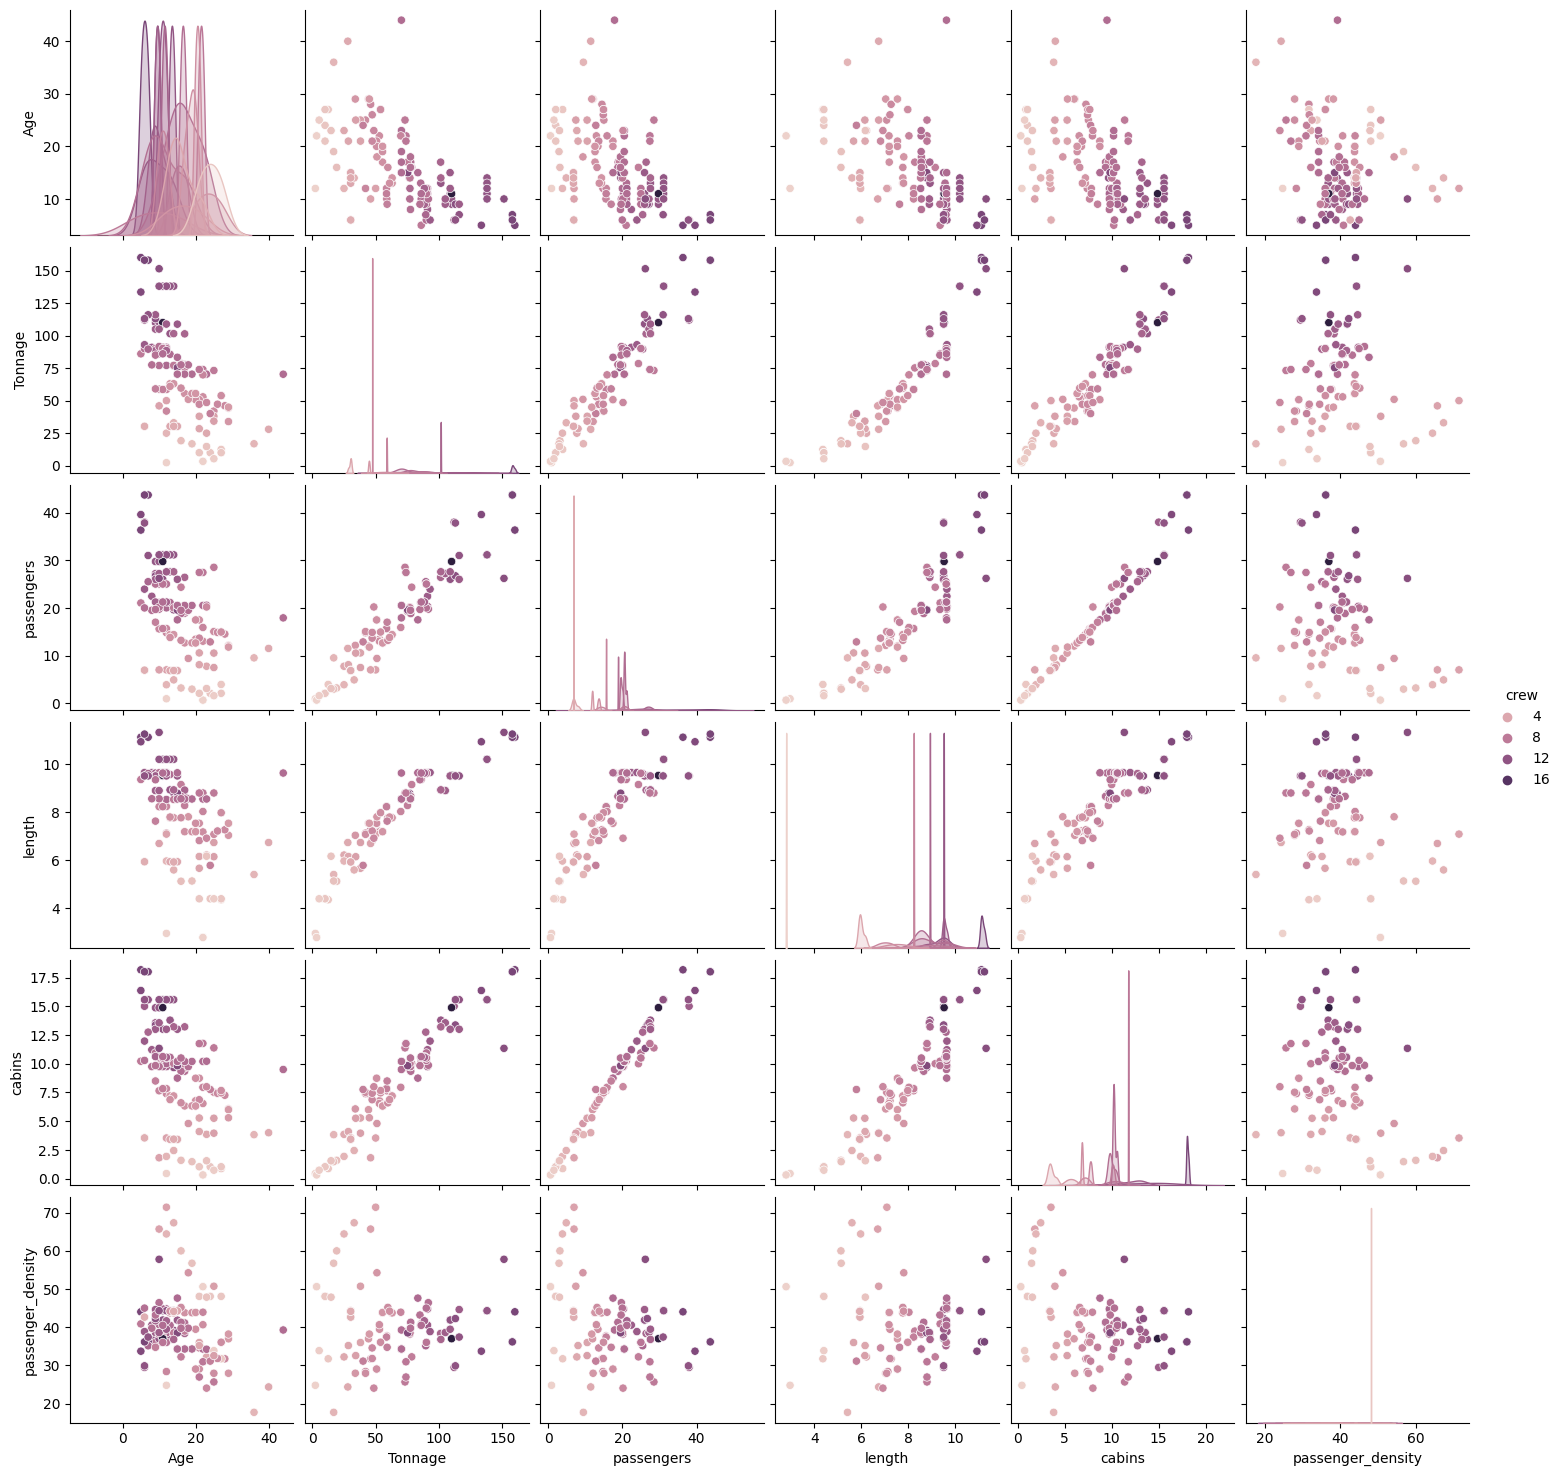

In [21]:
sns.pairplot(train_data, hue='crew', height=2.5)

We can see that there are some correlations between the features. Let's investigate this further:

/tmp/ipykernel_26108/2720968321.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, fmt='.2f')


<Axes: >

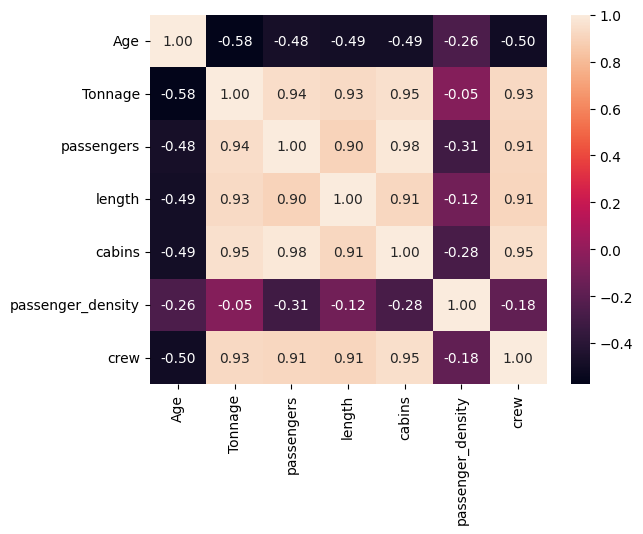

In [22]:
# heatmap
sns.heatmap(train_data.corr(), annot=True, fmt='.2f')

We can see that our target variable `crew` is higly correlatet with all the other features except "passenger_density" and "age". This is not surprising, since we can immagien that the crew size is related to the ship size, the number of cabins and the number of passengers. Let's plot the target variable against the other features:

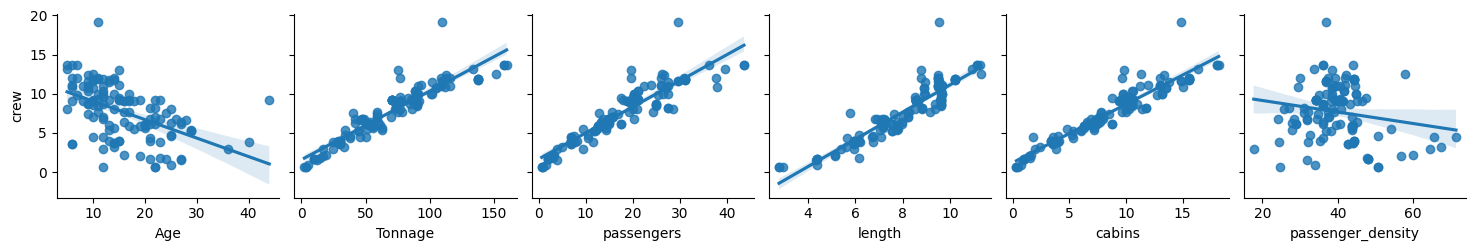

In [29]:
# get the keys of the columns of the features
features = train_data.columns[:-1]
# plot features against the target in a grid of subplots
sns.pairplot(train_data, x_vars=features[2:], y_vars='crew', height=2.5, kind='reg')

We can clear see that there are a strong linear relationship between the target and `Tonnage`, `passengers`, `lenght`, `cabins`.

#### Build the model

Fristly, we need to define the features and the target variable, and split our train_data in train and eval set (suddenly, we don't have much data, so we need to be careful with the eval set):

In [37]:
train = train_data.copy()
# drop Age, passenger_density
train.drop([ 'Ship_name', 'Cruise_line'  ,'Age', 'passenger_density'], axis=1, inplace=True)
train.head()

,Tonnage,passengers,length,cabins,crew
137,90.09,25.01,9.62,10.50,8.58
55,33.92,12.14,7.04,6.07,5.30
126,160.00,36.34,11.12,18.17,13.60
84,28.00,11.50,6.74,4.00,3.80
154,76.80,19.60,8.79,9.67,12.00


In [38]:
train, eval_ = train_test_split(train, test_size=0.2, random_state=42)
train_X = train.drop('crew', axis=1)
train_y = train['crew']
eval_X = eval_.drop('crew', axis=1)
eval_y = eval_['crew']

Let's scale the data since the features have different scales:

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
eval_X = scaler.transform(eval_X)


Fit a linear regression model:

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train_X, train_y)
preds = model.predict(eval_X)
print('RMSE: ', mean_squared_error(eval_y, preds, squared=False))  # classical metric for regression

# normalized RMSE
print('Normalized RMSE: ', mean_squared_error(eval_y, preds, squared=False) / eval_y.mean()) # normalized RMSE to understand the quality of the model


RMSE:  1.1738947086835665
Normalized RMSE:  0.1549774673797742


In [41]:
# print other metrics R2, and MAPE
from sklearn.metrics import r2_score, mean_absolute_percentage_error

print('R2: ', r2_score(eval_y, preds)) # R2 is close to 1, so the model is good.. t
print('MAPE: ', mean_absolute_percentage_error(eval_y, preds)) # MAPE is close to 0, so the model is good


R2:  0.9035225753477861
MAPE:  0.09463015147124369


Metrics:
  - RMSE: Root Mean Squared Error,  popular metric for regression problems, best theorethical foundation, since the linear regression model minimizes the squared error
  - MAPE: Mean Absolute Percentage Error, more robust to outliers than RMSE, more interpretable than RMSE  
  - Normalized RMSE: RMSE divided by the range of the target variable, more interpretable than RMSE
  - R2: Coefficient of determination, measures the proportion of the variance in the target variable that is predictable from the features, best value is 1, worst value is 0

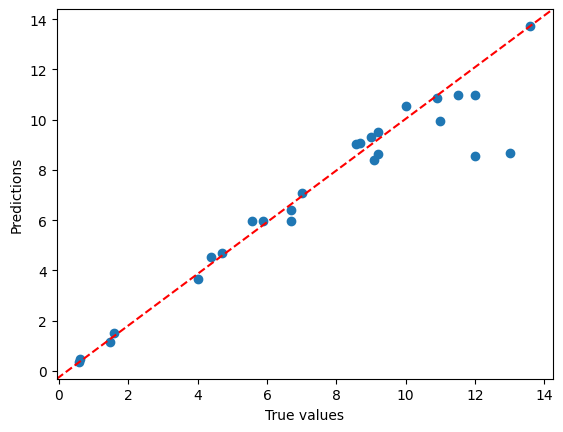

In [63]:
# diagnostics plot
plt.scatter(eval_y, preds)
# plot the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls='--', c='r')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

So far, so good. It seems that a simple linear regression model is able to predict the crew size with a decent accuracy. We could further select only one or two features and build a model with only those features, since the 3 features we selected are highly correlated. But let's keep it simple for now.

#### Assess the model performance on the test set

In [64]:
test = test_data.copy()
# drop Age, passenger_density
test.drop([ 'Ship_name', 'Cruise_line'  ,'Age', 'passenger_density'], axis=1, inplace=True)
test_X = test.drop('crew', axis=1)
test_y = test['crew']

test_X = scaler.transform(test_X)
preds = model.predict(test_X)
print('RMSE: ', mean_squared_error(test_y, preds, squared=False))
print('Normalized RMSE: ', mean_squared_error(test_y, preds, squared=False) / test_y.mean())
print('R2: ', r2_score(test_y, preds))
print('MAPE: ', mean_absolute_percentage_error(test_y, preds))

RMSE:  0.7845417376080066
Normalized RMSE:  0.09438450920506865
R2:  0.9524687351613018
MAPE:  0.0961764884012152


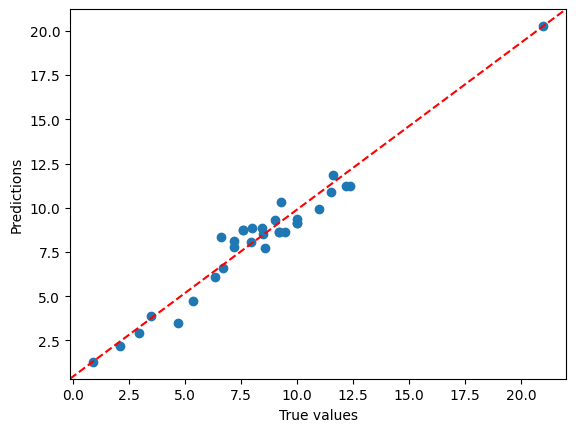

In [65]:
# diagnostics plot
plt.scatter(test_y, preds)
# plot the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls='--', c='r')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

#### Conclusion
- The model is able to predict the crew size with a decent accuracy.
- We may want to select only a subset of the features to build a simpler model. 
- Maybe the evaluation set is not useful, since we have very few data and our model doesn't use any hyperparameters.  We could use cross-validation instead.